In [1]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.listdir('/content/gdrive/MyDrive/Covid_Project/Data/Raw_Data')

['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_vaccine_global.csv',
 'time_series_covid19_deaths_global.csv',
 'URLs_for_data.txt']

In [4]:
covid_deaths_csv = '/content/gdrive/MyDrive/Covid_Project/Data/Raw_Data/time_series_covid19_deaths_global.csv'

In [5]:
covid_deaths_df = pd.read_csv(covid_deaths_csv)

In [6]:
covid_deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983,5983,6213,6266,6266,6325,6357,6357,6357,6477,6515,6577,6615,6677,6677,6677,6774,6804,6836,6864,6879,6879,6879,6936,6961,6978,6988,7000
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457,2457,2458,2459,2459,2460,2460,2460,2460,2461
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404,4441,4487,4520,4550,4578,4618,4654,4695,4730
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128,128,128,128,128,128,129,129,129,129
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026,1032,1042,1044,1049,1053,1057,1063,1070,1082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370,370,370,524,524,630,1022,1161,1306,1306,1306,2071,2327,2720,3016,3250,3397,3757,4145,4487,4813,5088
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609,3609,3611,3611,3613,3613,3615,3615,3621,3622
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380,1383,1384,1384,1386,1389,1391,1392,1395,1397
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221,3250,3272,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430,3447,3459,3474,3484,3491,3499,3509,3512,3515


In [7]:
# Deleting unnecessary columns.
covid_deaths_df.drop(['Province/State', 'Lat', 'Long'], inplace=True, axis=1)
covid_deaths_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983,5983,6213,6266,6266,6325,6357,6357,6357,6477,6515,6577,6615,6677,6677,6677,6774,6804,6836,6864,6879,6879,6879,6936,6961,6978,6988,7000
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457,2457,2458,2459,2459,2460,2460,2460,2460,2461
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404,4441,4487,4520,4550,4578,4618,4654,4695,4730
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128,128,128,128,128,128,129,129,129,129
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026,1032,1042,1044,1049,1053,1057,1063,1070,1082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370,370,370,524,524,630,1022,1161,1306,1306,1306,2071,2327,2720,3016,3250,3397,3757,4145,4487,4813,5088
275,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609,3609,3611,3611,3613,3613,3615,3615,3621,3622
276,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380,1383,1384,1384,1386,1389,1391,1392,1395,1397
277,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221,3250,3272,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430,3447,3459,3474,3484,3491,3499,3509,3512,3515


In [8]:
# Let's add the numbers for countries where data is for each region and not for full coutry. Example - Australia.
covid_deaths_df = covid_deaths_df.groupby('Country/Region', as_index=True).sum()

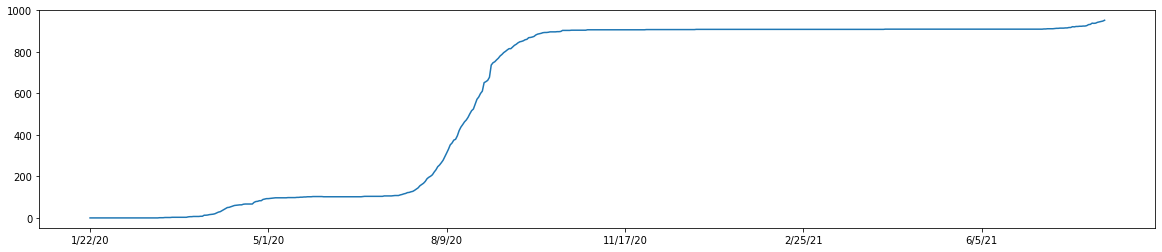

In [9]:
# Let's see data from Australia.
covid_deaths_df.loc['Australia'].plot(figsize=(20, 4))

In [10]:
# Changing from cumulative cases to daily cases. 
covid_deaths_df = covid_deaths_df.diff(periods=1, axis=1)
# Deleting NaN data.
covid_deaths_df.drop('1/22/20', inplace=True, axis=1)

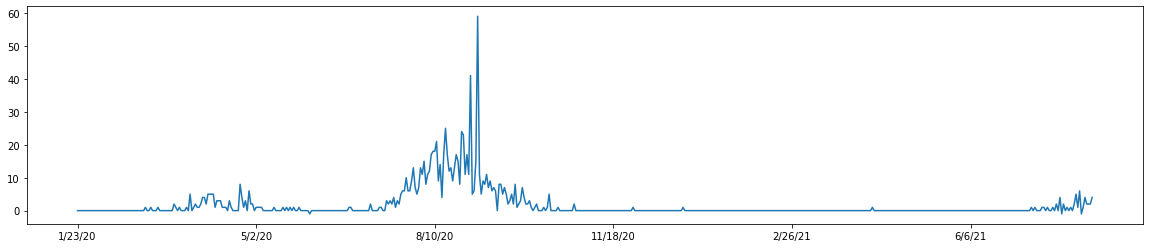

In [11]:
covid_deaths_df.loc['Australia'].plot(figsize=(20, 4))

In [12]:
# Checking for countries that reported negative deaths any day.
covid_deaths_df[(covid_deaths_df < 0).any(axis=1)]

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,5.0,0.0,3.0,1.0,6.0,4.0,2.0,5.0,5.0,1.0,2.0,3.0,12.0,1.0,3.0,4.0,4.0,1.0,2.0,7.0,3.0,6.0,3.0,5.0,3.0,5.0,2.0,4.0,4.0,6.0,10.0,2.0,5.0,4.0,4.0,6.0,7.0,12.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,-1.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,5.0,1.0,6.0,-1.0,1.0,4.0,2.0,2.0,2.0,4.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,2.0,0.0,2.0,0.0,0.0,7.0,2.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,3.0,0.0,8.0,2.0,1.0,4.0,6.0,0.0,0.0,6.0,4.0,7.0,6.0,4.0,0.0,0.0,6.0,5.0,3.0,3.0,2.0
Belize,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
Bosnia and Herzegovina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-11.0,0.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,9.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,4.0,3.0
Burma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,52.0,57.0,51.0,64.0,71.0,82.0,89.0,109.0,145.0,165.0,190.0,233.0,231.0,281.0,286.0,247.0,319.0,326.0,297.0,355.0,396.0,338.0,365.0,342.0,390.0,392.0,397.0,330.0,312.0,322.0,293.0,274.0,264.0,250.0,238.0,220.0,218.0,215.0,212.0
China,1.0,8.0,16.0,14.0,26.0,49.0,2.0,38.0,42.0,46.0,102.0,64.0,66.0,72.0,70.0,85.0,87.0,100.0,107.0,100.0,5.0,252.0,152.0,142.0,103.0,98.0,139.0,113.0,122.0,0.0,205.0,2.0,150.0,70.0,52.0,29.0,44.0,47.0,35.0,42.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Congo (Brazzaville),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


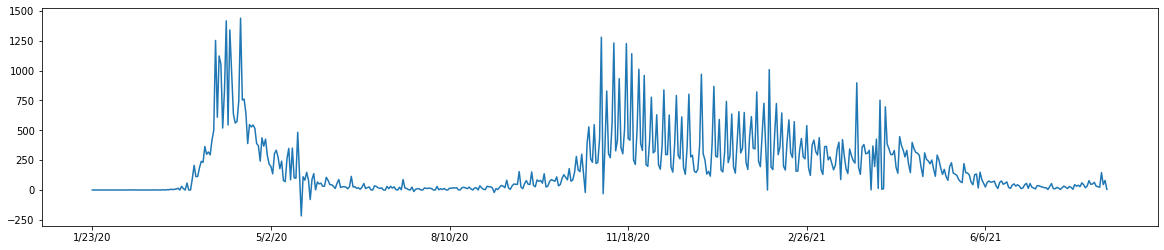

In [13]:
# Let's check for France.
covid_deaths_df.loc['France'].plot(figsize=(20, 4))

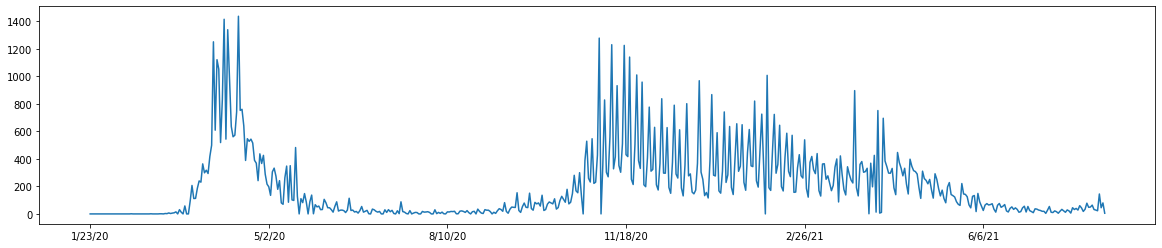

In [14]:
# Replacing negative data with 0.
covid_deaths_df[(covid_deaths_df < 0)] = 0
covid_deaths_df.loc['France'].plot(figsize=(20, 4))

## Let's delete outlier points.

In [15]:
covid_deaths_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

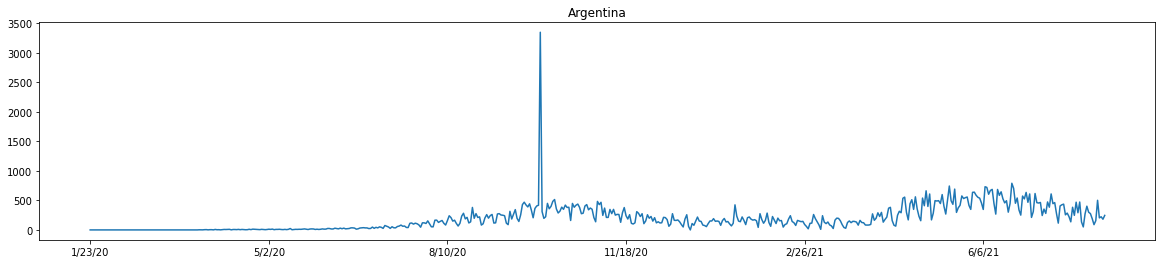

In [16]:
covid_deaths_df.loc['Argentina'].plot(figsize=(20, 4), title='Argentina')

In [17]:
covid_deaths_df.loc['Argentina', covid_deaths_df.loc['Argentina'] > 2000]

10/1/20    3351.0
Name: Argentina, dtype: float64

In [18]:
covid_deaths_df.loc['Argentina', covid_deaths_df.loc['Argentina'] > 2000] = covid_deaths_df.loc['Argentina', '9/1/20']

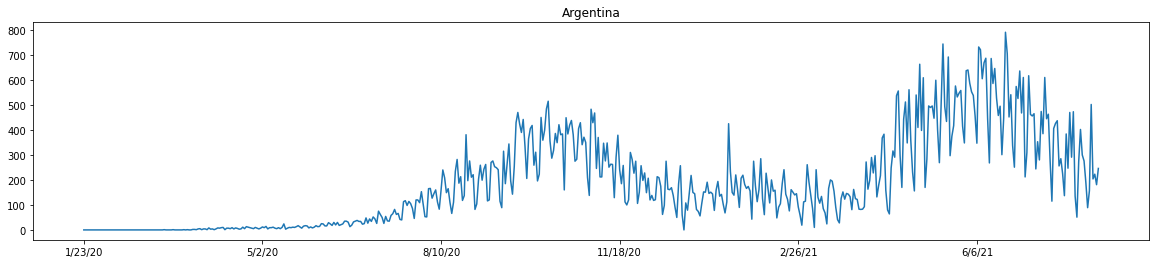

In [19]:
covid_deaths_df.loc['Argentina'].plot(figsize=(20, 4), title='Argentina')

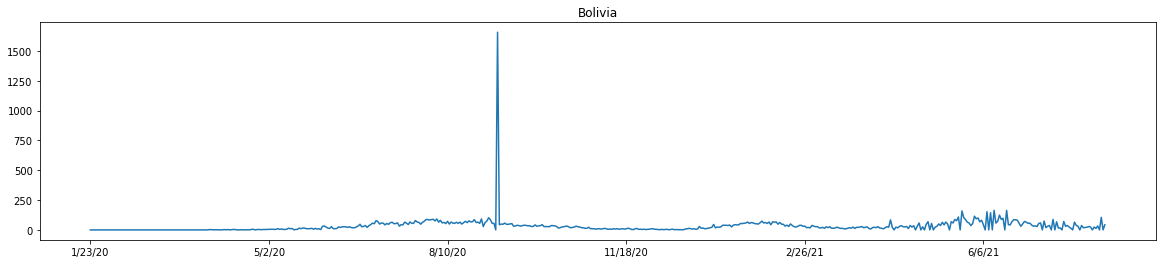

In [20]:
covid_deaths_df.loc['Bolivia'].plot(figsize=(20, 4), title='Bolivia')

In [21]:
covid_deaths_df.loc['Bolivia', covid_deaths_df.loc['Bolivia'] > 750]

9/7/20    1656.0
Name: Bolivia, dtype: float64

In [22]:
covid_deaths_df.loc['Bolivia', covid_deaths_df.loc['Bolivia'] > 750] = covid_deaths_df.loc['Bolivia', '8/7/20']

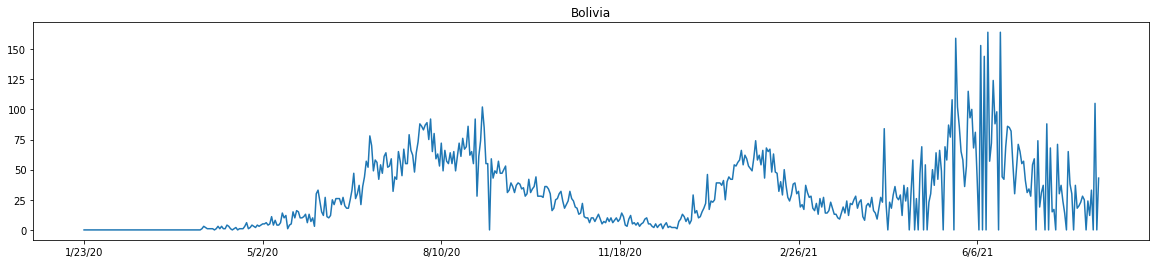

In [23]:
covid_deaths_df.loc['Bolivia'].plot(figsize=(20, 4), title='Bolivia')

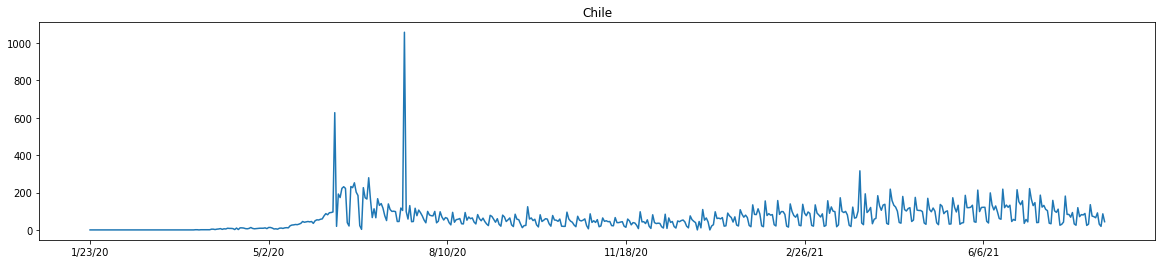

In [24]:
covid_deaths_df.loc['Chile'].plot(figsize=(20, 4), title='Chile')

In [25]:
covid_deaths_df.loc['Chile', covid_deaths_df.loc['Chile'] > 400]

6/8/20      627.0
7/17/20    1057.0
Name: Chile, dtype: float64

In [26]:
covid_deaths_df.loc['Chile', '6/8/20'] = covid_deaths_df.loc['Chile', '6/7/20']
covid_deaths_df.loc['Chile', '7/17/20'] = covid_deaths_df.loc['Chile', '7/16/20'] 

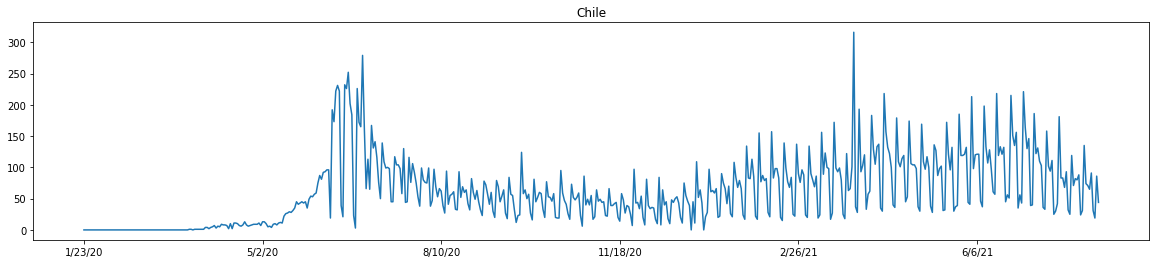

In [27]:
covid_deaths_df.loc['Chile'].plot(figsize=(20, 4), title='Chile')


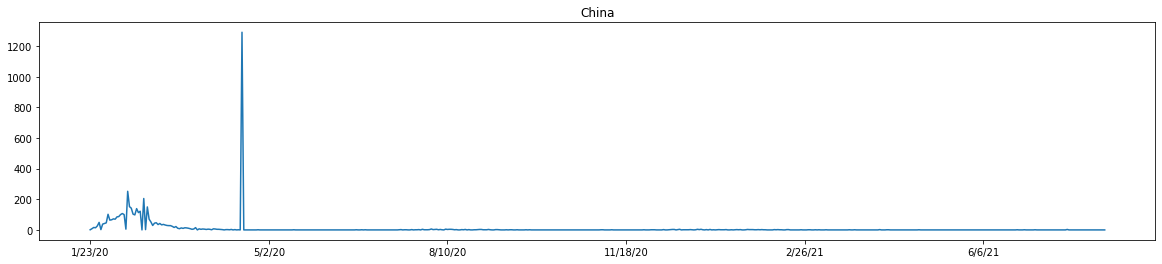

In [28]:
covid_deaths_df.loc['China'].plot(figsize=(20, 4), title='China')

In [29]:
covid_deaths_df.loc['China', covid_deaths_df.loc['China'] > 400]

4/17/20    1290.0
Name: China, dtype: float64

In [30]:
covid_deaths_df.loc['China', '4/17/20'] = covid_deaths_df.loc['China', '4/16/20'] 

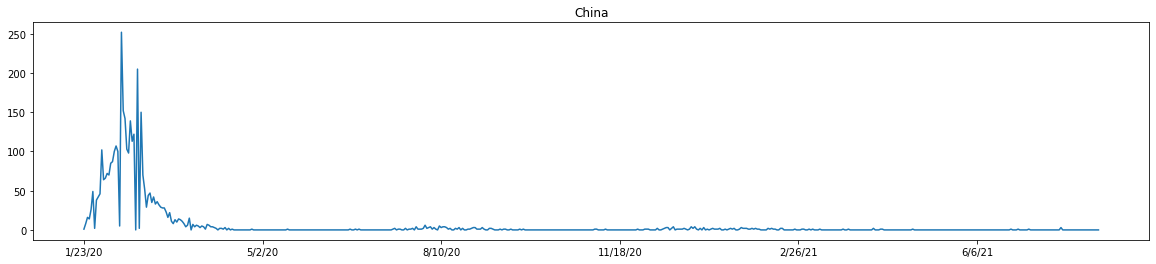

In [31]:
covid_deaths_df.loc['China'].plot(figsize=(20, 4), title='China')

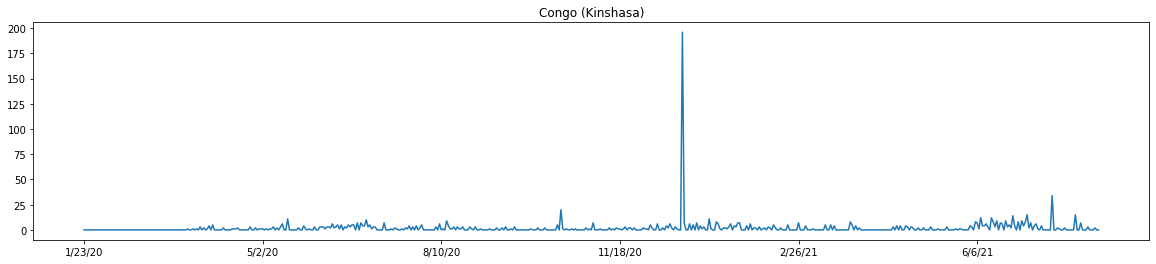

In [32]:
covid_deaths_df.loc['Congo (Kinshasa)'].plot(figsize=(20, 4), title='Congo (Kinshasa)')

In [33]:
covid_deaths_df.loc['Congo (Kinshasa)', covid_deaths_df.loc['Congo (Kinshasa)'] > 100]

12/23/20    196.0
Name: Congo (Kinshasa), dtype: float64

In [34]:
covid_deaths_df.loc['Congo (Kinshasa)', '12/23/20'] = covid_deaths_df.loc['Congo (Kinshasa)', '12/22/20']

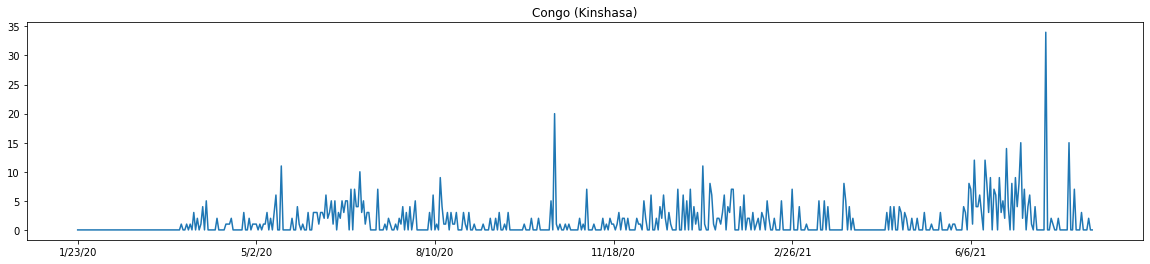

In [35]:
covid_deaths_df.loc['Congo (Kinshasa)'].plot(figsize=(20, 4), title='Congo (Kinshasa)')

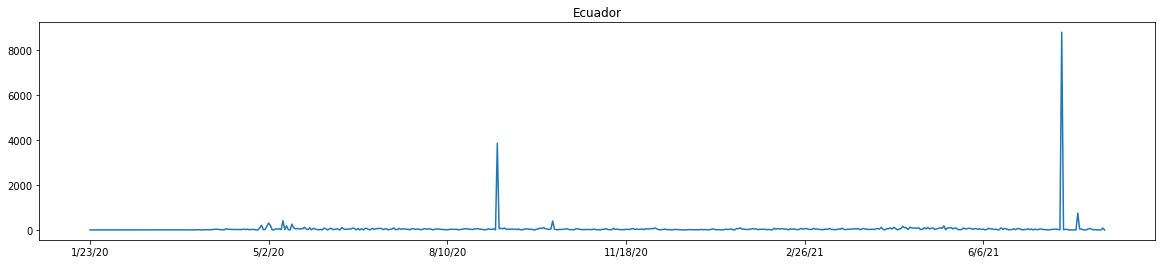

In [36]:
covid_deaths_df.loc['Ecuador'].plot(figsize=(20, 4), title='Ecuador') # Ecuador cannot be used in training.

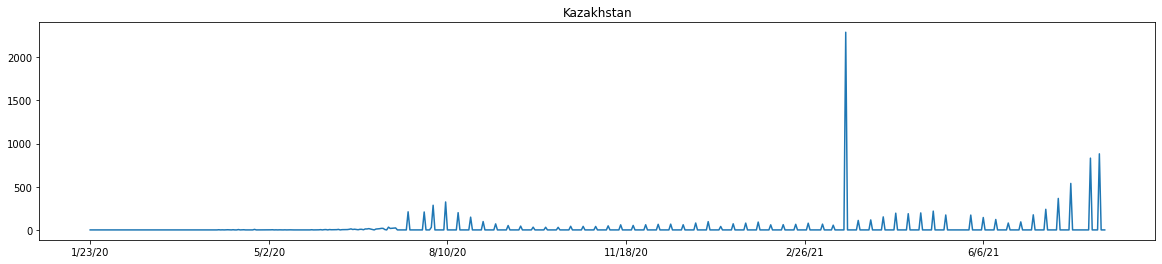

In [37]:
covid_deaths_df.loc['Kazakhstan'].plot(figsize=(20, 4), title='Kazakhstan')

In [38]:
covid_deaths_df.loc['Kazakhstan', covid_deaths_df.loc['Kazakhstan'] > 1000]

3/21/21    2291.0
Name: Kazakhstan, dtype: float64

In [39]:
covid_deaths_df.loc['Kazakhstan', '3/21/21'] = 0

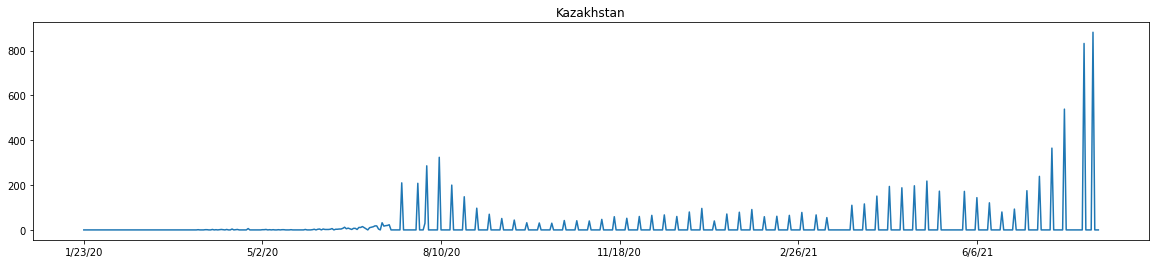

In [40]:
covid_deaths_df.loc['Kazakhstan'].plot(figsize=(20, 4), title='Kazakhstan')


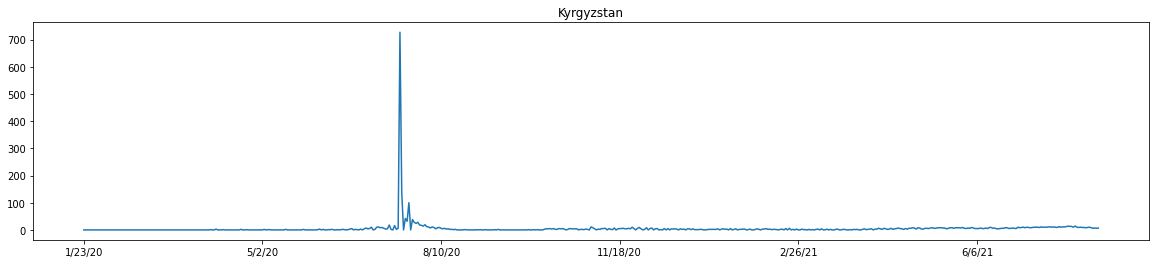

In [41]:
covid_deaths_df.loc['Kyrgyzstan'].plot(figsize=(20, 4), title='Kyrgyzstan')

In [42]:
covid_deaths_df.loc['Kyrgyzstan', covid_deaths_df.loc['Kyrgyzstan'] > 200]

7/18/20    727.0
Name: Kyrgyzstan, dtype: float64

In [43]:
covid_deaths_df.loc['Kyrgyzstan', covid_deaths_df.loc['Kyrgyzstan'] > 200]

7/18/20    727.0
Name: Kyrgyzstan, dtype: float64

In [44]:
covid_deaths_df.loc['Kyrgyzstan', '7/18/20'] = covid_deaths_df.loc['Kyrgyzstan', '7/17/20']

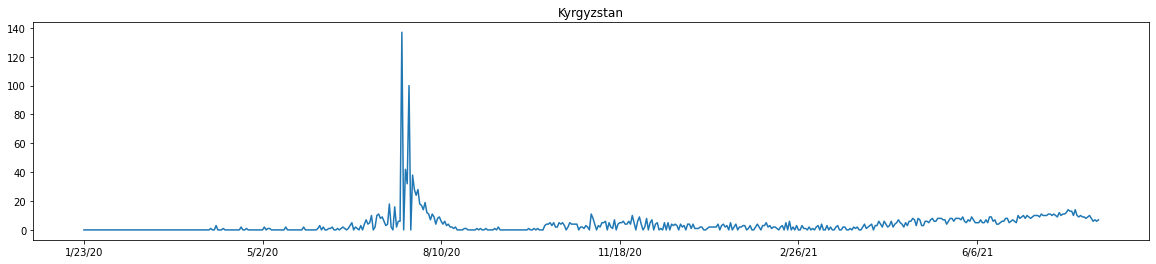

In [45]:
covid_deaths_df.loc['Kyrgyzstan'].plot(figsize=(20, 4), title='Kyrgyzstan')


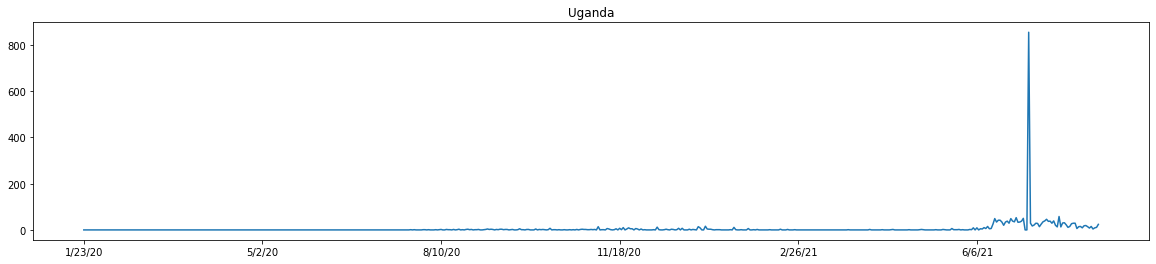

In [46]:
covid_deaths_df.loc['Uganda'].plot(figsize=(20, 4), title='Uganda')

In [47]:
covid_deaths_df.loc['Uganda', covid_deaths_df.loc['Uganda'] > 200]

7/5/21    855.0
Name: Uganda, dtype: float64

In [48]:
covid_deaths_df.loc['Uganda', '7/5/21'] = 855 / 3
covid_deaths_df.loc['Uganda', '7/4/21'] = 855 / 3
covid_deaths_df.loc['Uganda', '7/3/21'] = 855 / 3

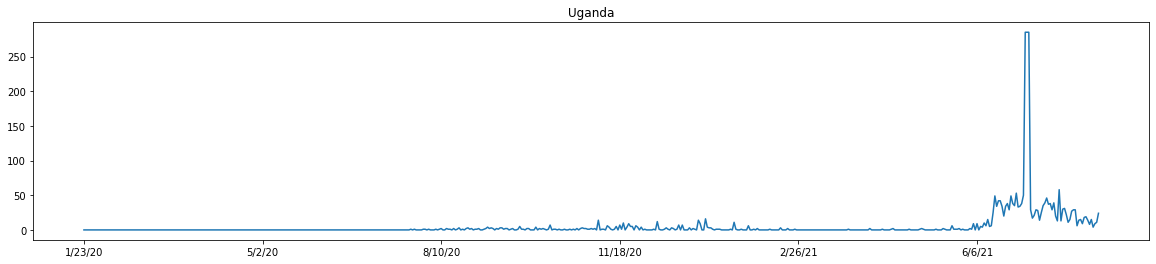

In [49]:
covid_deaths_df.loc['Uganda'].plot(figsize=(20, 4), title='Uganda')

# Smoothing out the data

In [50]:
# Smoothing out data.
covid_deaths_df = covid_deaths_df.ewm(span=10, adjust=False, axis=1).mean()

In [51]:
covid_deaths_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

In [52]:
covid_deaths_df

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,94.887770,91.635448,8.497446e+01,8.079728e+01,8.137960e+01,6.658331e+01,5.447725e+01,8.639048e+01,7.068312e+01,8.183164e+01,7.786225e+01,6.370548e+01,5.212266e+01,4.264582e+01,7.671021e+01,7.239927e+01,5.923576e+01,5.919290e+01,5.424873e+01,4.438533e+01,3.631527e+01,5.153067e+01,4.907055e+01,5.142136e+01,4.898111e+01,51.348183,42.012150,34.373577,45.760200,42.894709,40.913853,38.565879,34.281174,28.048233,22.948555,29.139726,28.387049,26.316676,23.350008,21.286370
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049639,0.040614,3.322945e-02,2.718774e-02,2.224451e-02,1.820005e-02,1.489095e-02,1.218351e-02,9.968324e-03,8.155902e-03,6.673011e-03,5.459736e-03,4.467057e-03,3.654865e-03,2.990344e-03,2.446645e-03,2.001800e-03,1.637837e-03,1.340048e-03,1.096403e-03,8.970570e-04,7.339558e-04,6.005093e-04,1.823095e-01,1.491623e-01,0.122042,0.099852,0.081697,0.066843,0.054690,0.044746,0.036611,0.211772,0.355086,0.290525,0.419521,0.343244,0.280836,0.229775,0.369816
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.220831,9.362498,9.660226e+00,1.008564e+01,1.061552e+01,1.104906e+01,1.122196e+01,1.190888e+01,1.265272e+01,1.307950e+01,1.306504e+01,1.341685e+01,1.315924e+01,1.367574e+01,1.446197e+01,1.601434e+01,1.582992e+01,1.549720e+01,1.595226e+01,1.596094e+01,1.687713e+01,1.817220e+01,1.941362e+01,2.479296e+01,2.537606e+01,26.216774,27.813724,29.483956,31.032328,32.844632,33.054699,33.772026,35.995294,35.450695,34.459660,33.285176,34.506053,34.777680,35.909011,35.743736
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.000001,8.934795e-07,7.310287e-07,5.981144e-07,4.893663e-07,4.003906e-07,3.275923e-07,2.680301e-07,2.192973e-07,1.794251e-07,1.468023e-07,1.201110e-07,9.827265e-08,8.040489e-08,6.578582e-08,5.382476e-08,4.403844e-08,3.603145e-08,2.948028e-08,2.412023e-08,1.973473e-08,1.614660e-08,1.321085e-08,1.080888e-08,0.181818,0.148760,0.121713,0.099583,0.081477,0.066663,0.054543,0.044626,0.036512,0.029873,0.024442,0.201816,0.165122,0.135100,0.110536
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.231209,3.552807,3.815933e+00,3.122127e+00,3.099922e+00,2.718118e+00,3.314824e+00,3.439401e+00,3.177692e+00,3.509021e+00,3.780108e+00,3.274634e+00,3.042882e+00,3.035085e+00,4.665070e+00,3.998694e+00,3.817113e+00,3.850365e+00,3.877571e+00,3.354377e+00,3.108126e+00,3.815740e+00,3.667423e+00,4.091528e+00,3.893069e+00,4.094329,3.895360,4.096204,3.715076,3.766880,3.809266,4.207581,5.260748,4.667885,4.728269,4.595857,4.487519,4.762516,5.169331,6.411271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Renormalizing confirmed cases and deaths.

In [53]:
# Deleting non relevant data.
covid_deaths_df.drop(index='Diamond Princess', inplace=True)
covid_deaths_df.drop(index='Summer Olympics 2020', inplace=True)
covid_deaths_df.drop(index='Holy See', inplace=True)
covid_deaths_df.drop(index='West Bank and Gaza', inplace=True)
covid_deaths_df.drop(index='Palau', inplace=True)
covid_deaths_df.drop(index='MS Zaandam', inplace=True)

In [54]:
max_covid_confirmed_by_country_csv = '/content/gdrive/MyDrive/Covid_Project/Data/Processed_Data/max_covid_confirmed_by_country.csv'
max_covid_confirmed_by_country_df = pd.read_csv(max_covid_confirmed_by_country_csv, index_col='Country/Region')

In [55]:
max_covid_confirmed_by_country_df.max(axis=1)

Country/Region
Afghanistan    1926.223395
Albania        1081.801514
Algeria        1455.678351
Andorra         111.935284
Angola          293.952815
                  ...     
Venezuela      1427.822465
Vietnam        8624.818914
Yemen           108.964644
Zambia         2685.508083
Zimbabwe       2257.901493
Length: 189, dtype: float64

In [56]:
covid_deaths_df = covid_deaths_df.divide(max_covid_confirmed_by_country_df.max(axis=1) / 10, axis=0)

In [57]:
covid_deaths_df

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.926104e-01,4.757260e-01,4.411454e-01,4.194596e-01,4.224826e-01,3.456676e-01,2.828190e-01,4.484967e-01,3.669518e-01,4.248294e-01,4.042223e-01,3.307274e-01,2.705951e-01,2.213960e-01,3.982415e-01,3.758612e-01,3.075228e-01,3.073003e-01,2.816326e-01,2.304267e-01,1.885309e-01,2.675218e-01,2.547501e-01,2.669543e-01,2.542857e-01,0.266574,0.218106,0.178451,0.237564,0.222688,0.212405,0.200215,0.177971,0.145613,0.119138,0.151279,0.147372,0.136623,0.121222,0.110508
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.588555e-04,3.754273e-04,3.071678e-04,2.513191e-04,2.056247e-04,1.682384e-04,1.376496e-04,1.126224e-04,9.214559e-05,7.539185e-05,6.168424e-05,5.046892e-05,4.129276e-05,3.378498e-05,2.764226e-05,2.261639e-05,1.850432e-05,1.513990e-05,1.238719e-05,1.013497e-05,8.292252e-06,6.784569e-06,5.551011e-06,1.685240e-03,1.378833e-03,0.001128,0.000923,0.000755,0.000618,0.000506,0.000414,0.000338,0.001958,0.003282,0.002686,0.003878,0.003173,0.002596,0.002124,0.003419
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.334388e-02,6.431708e-02,6.636237e-02,6.928481e-02,7.292492e-02,7.590320e-02,7.709094e-02,8.180982e-02,8.691974e-02,8.985156e-02,8.975226e-02,9.216908e-02,9.039939e-02,9.394757e-02,9.934868e-02,1.100129e-01,1.087460e-01,1.064604e-01,1.095864e-01,1.096460e-01,1.159400e-01,1.248366e-01,1.333647e-01,1.703189e-01,1.743246e-01,0.180100,0.191071,0.202544,0.213181,0.225631,0.227074,0.232002,0.247275,0.243534,0.236726,0.228657,0.237044,0.238910,0.246682,0.245547
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.192389e-07,9.755909e-08,7.982108e-08,6.530815e-08,5.343394e-08,4.371868e-08,3.576983e-08,2.926622e-08,2.394509e-08,1.959144e-08,1.602936e-08,1.311493e-08,1.073040e-08,8.779416e-09,7.183159e-09,5.877130e-09,4.808561e-09,3.934277e-09,3.218954e-09,2.633690e-09,2.154837e-09,1.763048e-09,1.442494e-09,1.180222e-09,9.656366e-10,0.016243,0.013290,0.010874,0.008897,0.007279,0.005956,0.004873,0.003987,0.003262,0.002669,0.002184,0.018030,0.014752,0.012069,0.009875
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.099227e-01,1.208632e-01,1.298145e-01,1.062118e-01,1.054565e-01,9.246784e-02,1.127672e-01,1.170052e-01,1.081021e-01,1.193736e-01,1.285957e-01,1.114000e-01,1.035160e-01,1.032508e-01,1.587013e-01,1.360318e-01,1.298546e-01,1.309858e-01,1.319114e-01,1.141128e-01,1.057356e-01,1.298079e-01,1.247623e-01,1.391900e-01,1.324386e-01,0.139285,0.132517,0.139349,0.126383,0.128146,0.129588,0.143138,0.178966,0.158797,0.160851,0.156347,0.152661,0.162016,0.175856,0.218105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [58]:
covid_deaths_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

## Saving data

In [59]:
# Saving these processed data to CSV.
covid_deaths_df.to_csv(r'/content/gdrive/MyDrive/Covid_Project/Data/Processed_Data/confirmed_deaths_processed.csv')